In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df=pd.read_csv('economic_index.csv')

In [56]:

df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [57]:
df.drop(columns=['year','month',"Unnamed: 0"],inplace=True)

In [58]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [59]:
df.isna().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [60]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   interest_rate      24 non-null     float64
 1   unemployment_rate  24 non-null     float64
 2   index_price        24 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 708.0 bytes


In [61]:
df.describe()

,interest_rate,unemployment_rate,index_price
count,24.000000,24.00000,24.000000
mean,2.072917,5.77500,1070.083333
std,0.349527,0.33002,210.735341
min,1.750000,5.30000,704.000000
25%,1.750000,5.50000,928.250000
50%,2.000000,5.85000,1061.000000
75%,2.500000,6.10000,1239.000000
max,2.750000,6.20000,1464.000000


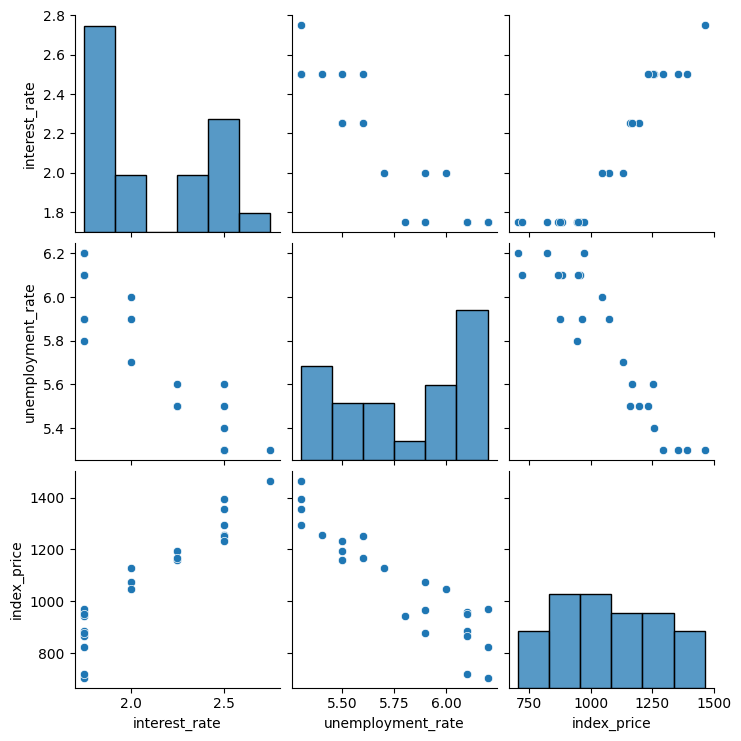

In [62]:
sns.pairplot(df)

In [63]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


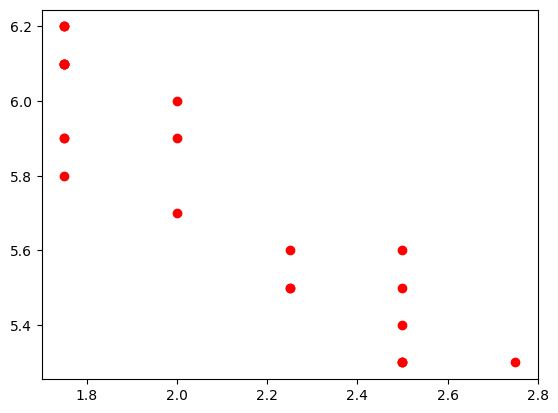

In [64]:
plt.scatter(df['interest_rate'],df['unemployment_rate'],color="r")

In [65]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [66]:
X

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [67]:
from sklearn.model_selection import train_test_split 


In [68]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [69]:
df['interest_rate']

0     2.75
1     2.50
2     2.50
3     2.50
4     2.50
5     2.50
6     2.50
7     2.25
8     2.25
9     2.25
10    2.00
11    2.00
12    2.00
13    1.75
14    1.75
15    1.75
16    1.75
17    1.75
18    1.75
19    1.75
20    1.75
21    1.75
22    1.75
23    1.75
Name: interest_rate, dtype: float64

In [70]:
# sns.regplot(df['interest_rate'],df['index_price'])

In [71]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

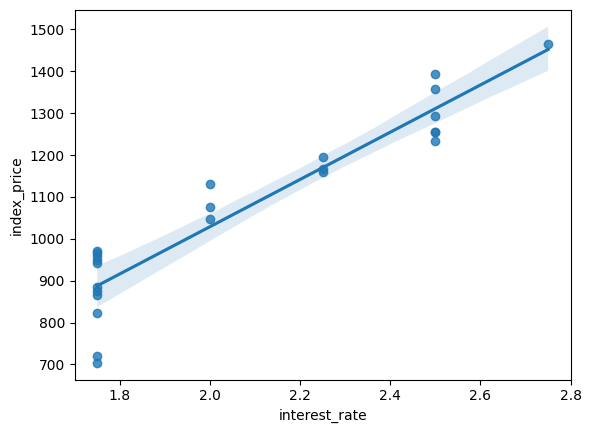

In [72]:
sns.regplot(x=df['interest_rate'], y=df['index_price'])


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

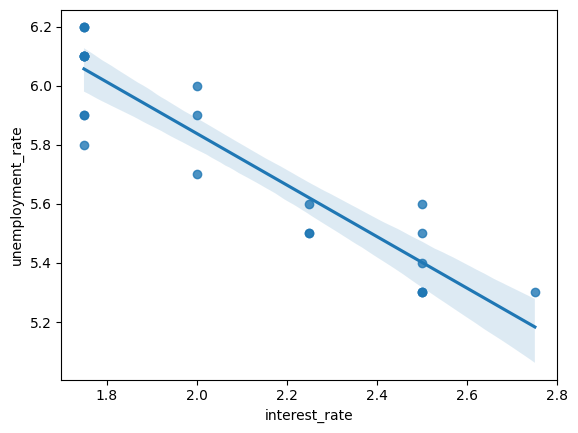

In [73]:
sns.regplot(x=df['interest_rate'], y=df['unemployment_rate'])

In [74]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [75]:
X_train_stand=scaler.fit_transform(X_train);
X_test_stand=scaler.fit_transform(X_test);

In [76]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [77]:
regression.fit(X_train_stand,Y_train);

In [78]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',
                                cv=3)

In [79]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [80]:
np.mean(validation_score)# for all cross validation here 3 we found neg mean_square error

np.float64(-5914.828180162372)

In [81]:
regression.coef_# two values as two independent features

array([  88.27275507, -116.25716066])

In [82]:

## prediction
y_pred=regression.predict(X_test_stand)

In [83]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [84]:
mse=mean_squared_error(y_pred,Y_test)
mae=mean_absolute_error(y_pred,Y_test)
rmse=np.sqrt(mse);
print(mse,mae,rmse)

8108.567426306607 73.80444932337097 90.04758423359623


In [85]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,y_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))

0.7591371539010257
0.5985619231683761


## Assumptions

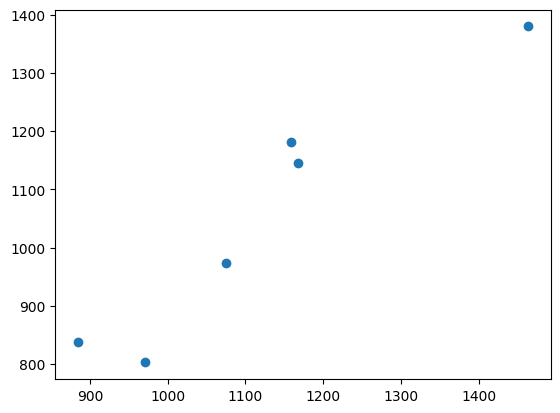

In [89]:
plt.scatter(Y_test,y_pred)

In [90]:
residuals=Y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


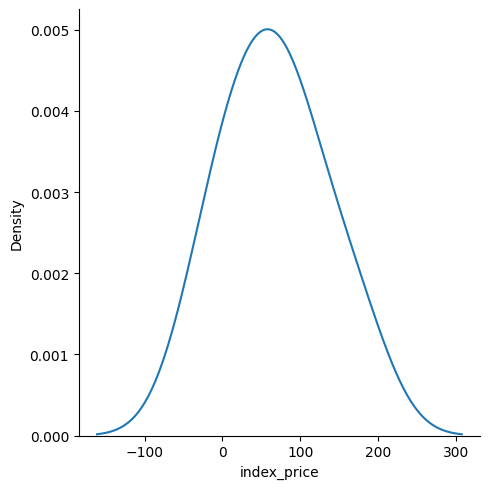

In [91]:
sns.displot(residuals,kind='kde')

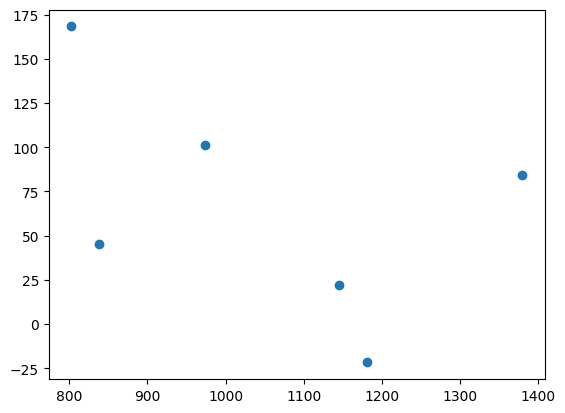

In [92]:
plt.scatter(y_pred,residuals)

In [94]:
## OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(Y_train,X_train).fit()

In [95]:
model.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              1468.
Date:                Sat, 01 Feb 2025   Prob (F-statistic):                    7.46e-19
Time:                        12:57:08   Log-Likelihood:                         -104.21
No. Observations:                  18   AIC:                                      212.4
Df Residuals:                      16   BIC:                                      214.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
interest_rate       569.9494     44.349     12.851      0.000     475.933     663.965
unemployment_rate   -20.5734     15.966     -1.289      0.216     -54.421      13.274
==============================================================================
Omnibus:                        1.657   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.437   Jarque-Bera (JB):                1.346
Skew:                          -0.611   Prob(JB):                        0.510
Kurtosis:                       2.451   Cond. No.                         14.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
print(regression.coef_)

[  88.27275507 -116.25716066]
